In [2]:
# Bot Building

def displayPathtoPrincess(n, grid):
    pos_col = {}
    pos_row = {}
    not_find = True
    
    for i in range(n):
        line = len(grid[i])
        for j in range(line):
            if grid[i][j] == 'm':
                pos_row['m'] = i
                pos_col['m'] = j
            elif grid[i][j] == 'p':
                pos_row['p'] = i
                pos_col['p'] = j
                
    while (not_find):
        if pos_row['m'] < pos_row['p']:
            pos_row['m'] = pos_row['m'] + 1
            print('DOWN')
        elif pos_row['m'] > pos_row['p']:
            pos_row['m'] = pos_row['m'] - 1
            print('UP')
            
        if pos_col['m'] < pos_col['p']:
            pos_col['m'] = pos_col['m'] + 1
            print('RIGHT')
        elif pos_col['m'] > pos_col['p']:
            pos_col['m'] = pos_col['m'] - 1
            print('LEFT')
            
        if pos_col['m'] == pos_col['p'] and pos_row['m'] == pos_row['p']:
            not_find = False
            
            
m = int(input())
grid = []
for i in range(0, m):
    grid.append(input().strip())
    
displayPathtoPrincess(m, grid)

5
p----
-----
--m--
-----
-----
UP
LEFT
UP
LEFT


In [3]:
# Bot Building

def nextMove(n, r, c, grid):
    pos_col_m = c
    pos_row_m = r
    pos_col_p = pos_row_p = 0
    
    for i in range(n):
        line = len(grid[i])
        for j in range(line):
            if grid[i][j] == 'p':
                pos_row_p = i
                pos_col_p = j
                
    if pos_row_m < pos_row_p:
        pos_row_m = pos_row_m + 1
        return 'DOWN'
    elif pos_row_m > pos_row_p:
        pos_row_m = pos_row_m - 1
        return 'UP'
    
    if pos_col_m < pos_col_p:
        pos_col_m = pos_col_m + 1
        return 'RIGHT'
    elif pos_col_m > pos_col_p:
        pos_col_m = pos_col_m - 1
        return 'LEFT'
    
    
n = int(input())
r, c = [int(i) for i in input().strip().split()]
grid = []

for i in range(0, n):
    grid.append(input())
    
print(nextMove(n, r, c, grid))

5
2 3
-----
-----
p---m
-----
-----
LEFT


In [4]:
# BotClean

import math

def update_position(posr, posc, dirties):
    nearest_dirt = []
    for i in range(len(dirties)):
        result = math.sqrt((dirties[i][0] - posr)**2 + (dirties[i][1] - posc)**2)
        nearest_dirt.append(result)
    return [x for (y, x) in sorted(zip(nearest_dirt, dirties))]

def next_move(posr, posc, board):
    dirties = []
    for i in range(len(board)):
        for j in range(len(board[i])):
            if board[i][j] == 'd':
                dirties.append([i, j])
                
    next_dirt = update_position(posr, posc, dirties)
    if next_dirt[0][1] < posc:
        print('LEFT')
    elif next_dirt[0][1] > posc:
        print('RIGHT')
    elif next_dirt[0][0] < posr:
        print('UP')
    elif next_dirt[0][0] > posr:
        print('DOWN')
    else:
        print('CLEAN')
        
        
if __name__ == "__main__":
    pos = [int(i) for i in input().strip().split()]
    board = [[j for j in input().strip()] for i in range(5)]
    next_move(pos[0], pos[1], board)

0 0
b---d
-d--d
--dd-
--d--
----d
RIGHT


In [6]:
# Correlation and Regression

import math

def mean(data):
    return sum(data)/len(data)

def var(data):
    sum = 0
    for i in range(len(data)):
        sum = sum + (data[i] - mean(data))**2
    return sum

def cov(dt1, dt2):
    sum = 0
    for i in range(len(dt1)):
        sum += (dt1[i] - mean(dt1)) * (dt2[i] - mean(dt2))
    return sum

physics = [15.0, 12.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 5.0, 3.0]
history = [10.0, 25.0, 17.0, 11.0, 13.0, 17.0, 20.0, 13.0, 9.0, 15.0]

mean_history = mean(history)
mean_physics = mean(physics)

var_physics = var(physics)
var_history = var(history)

cov = cov(physics, history)
std = math.sqrt(var_physics * var_history)

r = cov / std
print(round(r, 3))

0.145


In [7]:
def mean(data):
    return sum(data) / len(data)

physics = [15.0, 12.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 5.0, 3.0]
history = [10.0, 25.0, 17.0, 11.0, 13.0, 17.0, 20.0, 13.0, 9.0, 15.0]

mean_history = mean(history)
mean_physics = mean(physics)

var_physics = sum([(p - mean_physics)**2 for p in physics])
sum_phy_his = 0

for i in range(len(physics)):
    sum_phy_his += (physics[i] - mean_physics) * (history[i] - mean_history)
    
slope = sum_phy_his / var_physics
print(round(slope, 3))

0.208


In [8]:
def mean(data):
    return sum(data) / len(data)

# Set data
physics = [15.0, 12.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 5.0, 3.0]
history = [10.0, 25.0, 17.0, 11.0, 13.0, 17.0, 20.0, 13.0, 9.0, 15.0]

mean_physics = mean(physics)
mean_history = mean(history)

var_physics = sum([(p - mean_physics) ** 2 for p in physics])
sum_phy_his = 0
for i in range(len(physics)):
    sum_phy_his += (physics[i] - mean_physics) * (history[i] - mean_history)

# b = Σ(x - mean(x)) * (y - mean(y)) / Σ (x - mean(x))²
b = sum_phy_his / var_physics

# physics is x, variable independent
# history is y, variable dependent
# a = mean(y) - b * mean(x)
a = mean_history - b * mean_physics

result = b*10 + a
print(round(result, 1))

15.5


In [9]:
y = 7

val_x = (9*y + 107)/20

print(round(val_x, 1))

8.5


In [2]:
import math

def pearson(first_data, second_data, n):
    sum_first_data = sum(first_data)
    sum_second_data = sum(second_data)
    sum_data = sum([x*y for x, y in zip(first_data, second_data)])
    
    sum_first_data_sq = sum([x**2 for x in first_data])
    sum_first_data_mult_sq = sum_first_data ** 2
    sum_second_data_sq = sum([y**2 for y in second_data])
    sum_second_data_mult_sq = sum_second_data ** 2
    
    numerator = (n*sum_data) - (sum_first_data * sum_second_data)
    den_first_data = math.sqrt((n*sum_first_data_sq) - sum_first_data_mult_sq)
    den_second_data = math.sqrt((n*sum_second_data_sq) - sum_second_data_mult_sq)
    
    return round(numerator/(den_first_data*den_second_data), 2)


n = int(input())
mathematics = []
physics = []
chemistry = []

for i in range(n):
    elements = list(map(float, input().split()))
    mathematics.append(elements[0])
    physics.append(elements[1])
    chemistry.append(elements[2])
    
print(pearson(mathematics, physics, float(n)))
print(pearson(mathematics, chemistry, float(n)))
print(pearson(chemistry, physics, float(n)))

4
73 72 76
48 67 76
95 92 95
95 95 96
0.94
0.89
0.99


In [3]:
from sklearn import linear_model

features, rows = map(int, input().split())
X, Y = [], []

for i in range(rows):
    x = [0]
    elements = list(map(float, input().split()))
    for j in range(len(elements)):
        if j < features:
            x.append(elements[j])
        else:
            Y.append(elements[j])
    X.append(x)
    
model = linear_model.LinearRegression()
model.fit(X, Y)
a = model.intercept_
b = model.coef_

new_rows = int(input())
new_X = []

for i in range(new_rows):
    x = [0]
    elements = list(map(float, input().split()))
    for j in range(len(elements)):
        x.append(elements[j])
    new_X.append(x)
    
result = model.predict(new_X)

for i in range(len(result)):
    print(round(result[i], 2))

2 7
0.18 0.89 109.85
1.0 0.26 155.72
0.92 0.11 137.66
0.07 0.37 76.17
0.85 0.16 139.75
0.99 0.41 162.6
0.87 0.47 151.77
4
0.49 0.18
0.57 0.83
0.56 0.64
0.76 0.18
105.21
142.67
132.94
129.7


In [4]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

features, rows = map(int, input().split())
X, Y = [], []

for i in range(rows):
    x = [0]
    elements = list(map(float, input().split()))
    for j in range(len(elements)):
        if j < features:
            x.append(elements[j])
        else:
            Y.append(elements[j])
    X.append(x)
    
poly = PolynomialFeatures(degree = 3)

model = linear_model.LinearRegression()
model.fit(poly.fit_transform(np.array(X)), Y)

new_rows = int(input())
new_X = []
for i in range(new_rows):
    x = [0]
    elements = list(map(float, input().split()))
    for j in range(len(elements)):
        x.append(elements[j])
    new_X.append(x)
    
result = model.predict(poly.fit_transform(np.array(new_X)))
for i in range(len(result)):
    print(round(result[i], 2))

2 5
0.44 0.68 511.14
0.99 0.23 717.1
0.84 0.29 607.91
0.28 0.45 270.4
0.07 0.83 289.88
2
0.05 0.54
0.911 0.91
171.96
1293.66


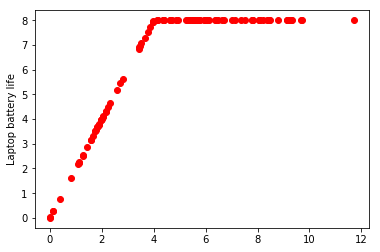

C:\Users\maoja\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
C:\Users\maoja\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


1.5
3.0


In [12]:
import sys
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://s3.amazonaws.com/hr-testcases/399/assets/trainingdata.txt', header = None)

plt.plot(dataset.iloc[:,0], dataset.iloc[:,1], 'ro')
plt.ylabel('Laptop battery life')
plt.show()

dataset = dataset[dataset.iloc[:, 1] < 8]

dataset.insert(0, len(dataset.columns), 0)

X = dataset.iloc[:,0:2].as_matrix()
Y = dataset.iloc[:,2].as_matrix()

model = linear_model.LinearRegression()
model.fit(X, Y)

timeCharged = float(input().strip())
result = model.predict([[0, timeCharged]])
if result[0] > 8:
    print(8.0)
else:
    print(round(result[0], 2))

In [15]:
import numpy as np
import math
import statistics as stpy
from scipy import stats

def mean_confidence_interval(length, mean, stdev):
    return 1.96 * (stdev/math.sqrt(length))

total = int(input())
numbers = list(map(int, input().split()))

mean = np.mean(numbers)
median = np.median(numbers)
mode = int(stats.mode(numbers)[0])
stdev = stpy.pstdev(numbers)
confidence_interval = mean_confidence_interval(total, mean, stdev)
min_confidence = round(mean - confidence_interval, 1)
max_confidence = round(mean + confidence_interval, 1)

print(round(mean, 1))
print(round(median, 1))
print(mode)
print(round(stdev, 1))
print("{} {}".format(min_confidence, max_confidence))

10
64630 11735 14216 99233 14470 4978 73429 38120 51135 67060
43900.6
44627.5
4978
30466.9
25017.0 62784.2
